## Homework 4

In [1]:
from zlib import crc32
theory = crc32('Самохина'.lower().encode('utf-8'))%2+1
practice = 1

In [2]:
theory, practice

(1, 1)

### Practice. Ex.1

Реализовать визуализацию зависимости распределения Gumbel-Softmax от
температуры.

Пример для распределения Дирихле:
http://blog.bogatron.net/blog/2014/02/02/visualizing-dirichlet-distributions/


In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

from math import gamma
from functools import reduce
from operator import mul

corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

In [4]:
# Mid-points of triangle sides opposite of each corner
midpoints = [(corners[(i + 1) % 3] + corners[(i + 2) % 3]) / 2.0 \
             for i in range(3)]
def xy2bc(xy, tol=1.e-3):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    s = [(corners[i] - midpoints[i]).dot(xy - midpoints[i]) / 0.75 \
         for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)

In [5]:
class Dirichlet(object):
    def __init__(self, alpha):        
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / reduce(mul, [gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        
        return self._coef * reduce(mul, [xx ** (aa - 1)
                                         for (xx, aa)in zip(x, self._alpha)])

In [6]:
class GumbelSoftmax(object):
    def __init__(self, pi=[1,1,1], tau = 1):
        
        self.pi = np.array(pi)
        self.tau = tau        
        self.k = len(self.pi) 
        
    def pdf(self, x):
        
        x = np.array(x)
        res = gamma(self.k)*(self.tau**(self.k-1))*(reduce(mul, self.pi)) * \
        (self.pi*(x**(-self.tau))).sum()**(-self.k)*reduce(mul, x**(-self.tau-1))
        return res
    
    

    def __call__(self):
        
        k = len(self.pi)
        res = softmax(self.pi + np.random.gumbel(loc=0., scale=1., size = k))
        
        return res    
 

In [7]:
def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')

In [8]:
def draw_many_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):


    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    
    fig, axes = plt.subplots(1, len(dist), figsize=(16,6))
    
    i = 0
    for d in dist:
        ax = axes[i]
        pvals = [d.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]
        ax.tricontourf(trimesh, pvals, nlevels, **kwargs)
        ax.axis('equal')
        ax.axis('off')
        i+=1

### Визуализация зависимости распределения Gumbel-Softmax от температуры

#### За основу возьмем распределение с температурой 2
оно выглядит нагляднее других

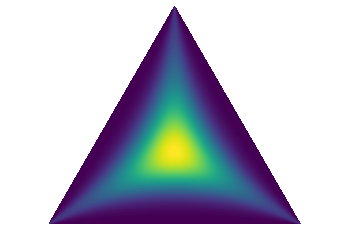

In [9]:
draw_pdf_contours(GumbelSoftmax([1, 1, 1], 2))

Заодно рассмотрим изменение распределения в зависимости от распределения вероятностей вершин.

Проварьируем вес верхней вершины от 10x до 0.1x относительно двух нижних.

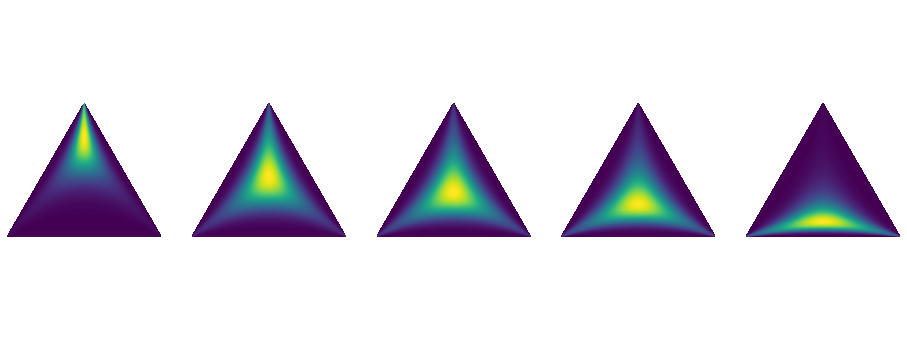

In [10]:
draw_many_pdf_contours([GumbelSoftmax([1, 1, 10], 2), GumbelSoftmax([1, 1, 2], 2), \
                        GumbelSoftmax([1, 1, 1], 2), \
                        GumbelSoftmax([2, 2, 1], 2), GumbelSoftmax([10, 10, 1], 2)])

Теперь рассмотрим каждый из данных случаев, варьируя температуру.

Возьмём температуры 2, 5, 10, 30

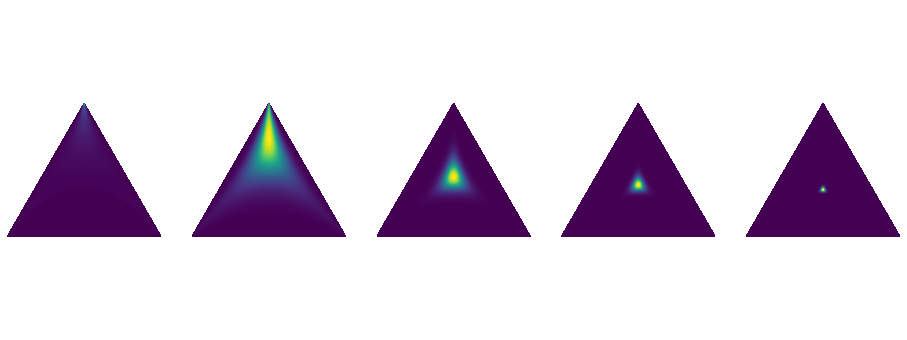

In [11]:
draw_many_pdf_contours([GumbelSoftmax([1, 1, 10], 1.5),\
                        GumbelSoftmax([1, 1, 10], 2),  GumbelSoftmax([1, 1, 10], 5), \
                        GumbelSoftmax([1, 1, 10], 10), GumbelSoftmax([1, 1, 10], 30)])

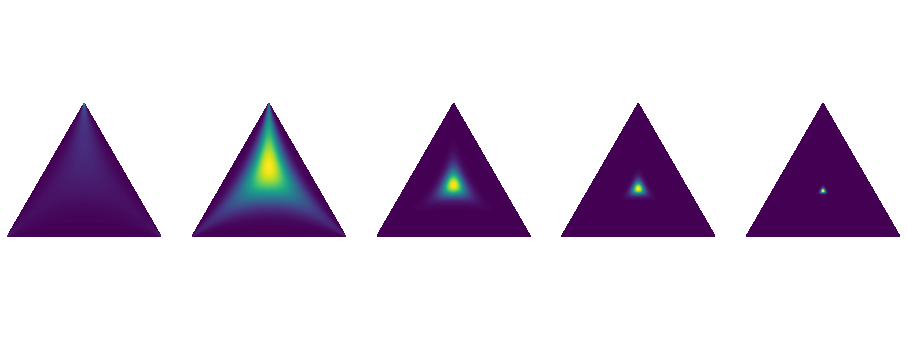

In [12]:
draw_many_pdf_contours([GumbelSoftmax([1, 1, 3], 1.5),\
                        GumbelSoftmax([1, 1, 3], 2), GumbelSoftmax([1, 1, 3], 5), \
                        GumbelSoftmax([1, 1, 3], 10), GumbelSoftmax([1, 1, 3], 30)])

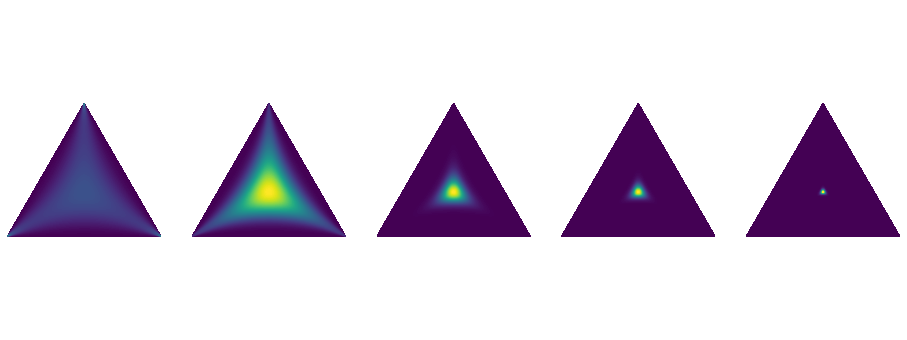

In [13]:
draw_many_pdf_contours([GumbelSoftmax([1, 1, 1], 1.5),\
                        GumbelSoftmax([1, 1, 1], 2), GumbelSoftmax([1, 1, 1], 5), \
                        GumbelSoftmax([1, 1, 1], 10), GumbelSoftmax([1, 1, 1], 30)])

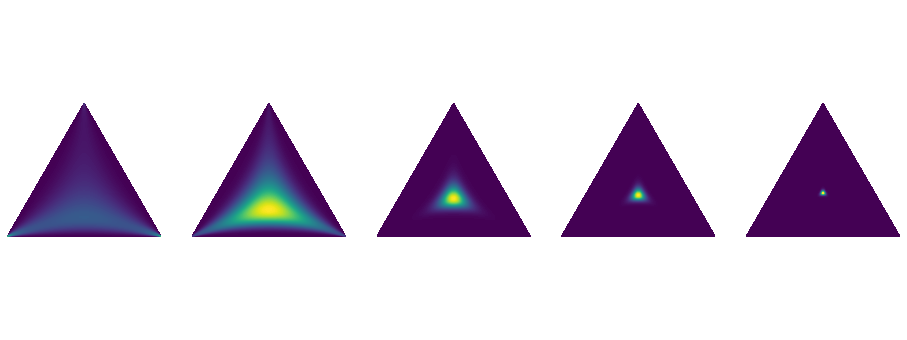

In [14]:
draw_many_pdf_contours([GumbelSoftmax([3, 3, 1], 1.5),\
                        GumbelSoftmax([3, 3, 1], 2), GumbelSoftmax([3, 3, 1], 5), \
                        GumbelSoftmax([3, 3, 1], 10), GumbelSoftmax([3, 3, 1], 30)])

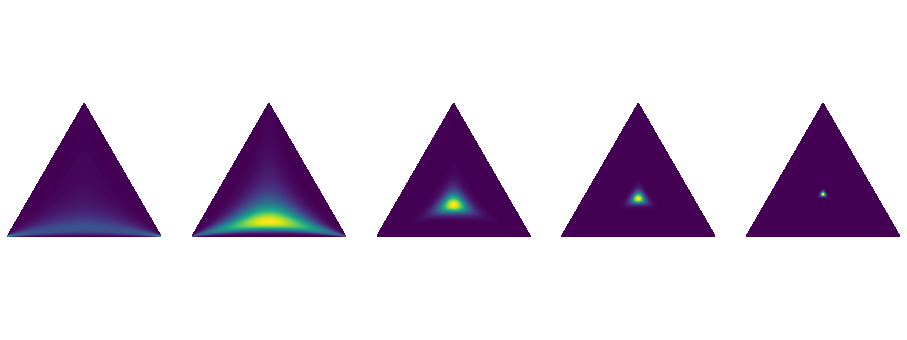

In [15]:
draw_many_pdf_contours([GumbelSoftmax([10, 10, 1], 1.5),\
                        GumbelSoftmax([10, 10, 1], 2), GumbelSoftmax([10, 10, 1], 5), \
                        GumbelSoftmax([10, 10, 1], 10), GumbelSoftmax([10, 10, 1], 30)])